In [35]:
import json
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal

In [2]:
with open('sample.txt', 'r') as f:
    data = json.load(f)

In [75]:
a = np.array(data['audio'])

In [88]:
fs = data['fs']

In [21]:
fa = np.fft.fft(a)

In [106]:
f, t, sxx = signal.spectrogram(a / np.max(a), fs, nperseg=200000)
sxx.shape

(100001, 73)

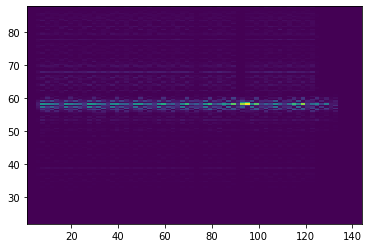

In [108]:
plt.pcolormesh(t, f[50:200], sxx[50:200, :], shading='gourand')

In [69]:
fs = 10e3
t = 20000
a = np.array([np.sin(1 / 2 * np.pi * i + 100 * np.cos(2 * i / t * np.pi)) for i in range(t)])

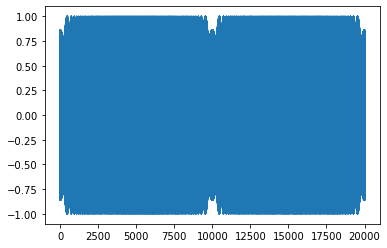

In [70]:
plt.plot(a)

In [71]:
f, t, sxx = signal.spectrogram(a, fs)

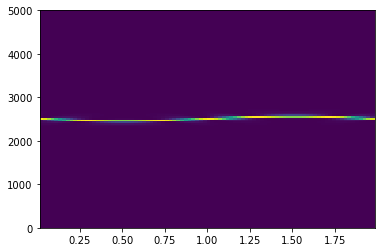

In [72]:
plt.pcolormesh(t, f, sxx, shading='gourand')

In [66]:
fs = 10e3

N = 1e5

amp = 2 * np.sqrt(2)

noise_power = 0.01 * fs / 2

time = np.arange(N) / float(fs)

mod = 500*np.cos(2*np.pi*0.25*time)

carrier = amp * np.sin(2*np.pi*3e3*time + mod)

noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

noise *= np.exp(-time/5)

x = carrier + noise

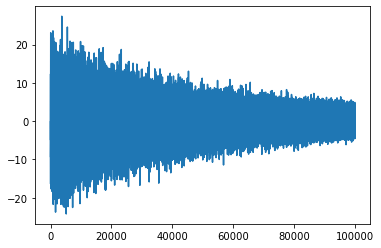

In [68]:
plt.plot(x)

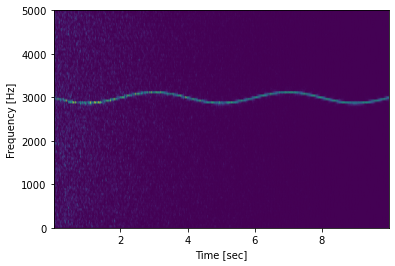

In [67]:
f, t, Sxx = signal.spectrogram(x, fs)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()